# Exploratory Data Analysis(EDA) and Experiments on Data

### Context
This data has been taken from kaggle datasets.
> The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

We are going to create a Pandas dataframe using the spam.csv file, to view and analyze the data.

In [52]:
import pandas as pd

**Pandas assumes UTF-8 encoding by default.**

Our spam.csv file is not `UTF-8`. That’s why it shows an `error` which is basically not a logical error.

This is extremely common with:
* Older spam datasets
* Files exported from Windows tools

**Fixing this Error**
> We can fix this `error` manually by using a simple encoding attribute inside `.read_csv` function by assigning `cp1252` value which is **Windows Specific Encoding**.


In [3]:
df = pd.read_csv("../Data/raw/spam.csv", encoding="cp1252")

### Sample Data loading
Here is the simple `sample` function we used to load some random data from the data set.

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3649,ham,"We are hoping to get away by 7, from Langport....",NaN,NaN,NaN
1381,ham,We spend our days waiting for the ideal path t...,NaN,NaN,NaN
4848,ham,either way works for me. I am &lt;#&gt; year...,NaN,NaN,NaN
5291,ham,Xy trying smth now. U eat already? We havent...,NaN,NaN,NaN
5136,ham,There are some nice pubs near here or there is...,NaN,NaN,NaN


**Total Data**

In [5]:
df.shape

(5572, 5)

So here we have total data of 5572 rows and 5 columns

## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


There are 5572 non-null values in v1 and v2 columns but in Unnamed columns there are 50 non-null in 2, 12 in 3 and 6 in 4 column while the remaining are null. So for removing null values we should need to remove the last 3 columns.

In [7]:
df.drop(columns=df.columns[df.columns.str.contains("^Unnamed")], inplace=True)

There are Unnamed columns in spam.csv so we can not find them just by using
>`df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 2"], inplace=True)`
So for that we recreated `df` or **drop() twice** inconsistently across cells.

In [8]:
df.sample(5)

,v1,v2
1340,ham,Might ax well im there.
1976,ham,Lol alright i was thinkin that too haha
448,ham,LOL ... Have you made plans for new years?
3265,ham,tap & spile at seven. * Is that pub on gas st ...
4938,ham,Tomarrow i want to got to court. At &lt;DECIM...


So after that now we have two non-null columns in dataset but there names are not descriptive.
For that we need to rename these columns to make them descriptive.

In [9]:
df.rename(columns={
    "v1": "target",
    "v2": "text"
}, inplace=True)
df.sample(5)

,target,text
393,ham,Yes i think so. I am in office but my lap is i...
5512,ham,"Just making dinner, you ?"
2429,spam,Guess who am I?This is the first time I create...
3658,ham,Wait.i will come out.. &lt;#&gt; min:)
3621,ham,Goin to workout lor... Muz lose e fats...


Now the columns name change to target and text.

But now we don't need the target values in text formate like (ham and spam), So we need to convert this into numbers.

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Now we have (0,1) instead of (ham,spam).
We make them by using preprocessing encoder in ML library/Module sklearn to change them into binary.

Checking missing values.

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

Check for duplicated values.

In [13]:
df.duplicated().sum()

np.int64(403)

There are 403 duplicated values.

Remove duplicate values.

In [14]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5169, 2)

Now there is no duplicate values in this and unique values are 5169.

## 2.EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


distribut values of spam and ham.

In [17]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

We have 4516 ham values and 653 spam values or mails.

To show this visually and more clearly for that we will use matplotlib.

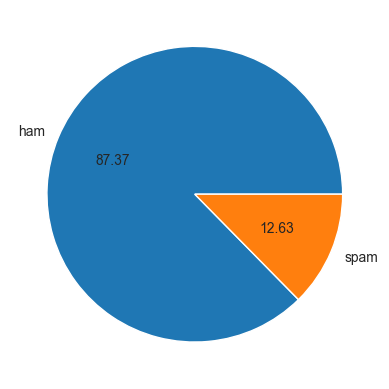

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

So we have 87.37% ham values and 12.63% spam values. And Data is imbalanced (ham is too large and spam is to small percent)

### Deep Data Analysis

Here we will make three different columns in which one will contain no. of characters, one will contain no. of worlds and one will contain no. of sentences in mail.

In [19]:
import nltk

In [20]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\AR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Describe function for total.

In [27]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Describe for ham.

In [28]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


Describe for spam.

In [29]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

Draw histogram of ham on the basis of no. of characters.

<Axes: xlabel='num_characters', ylabel='Count'>

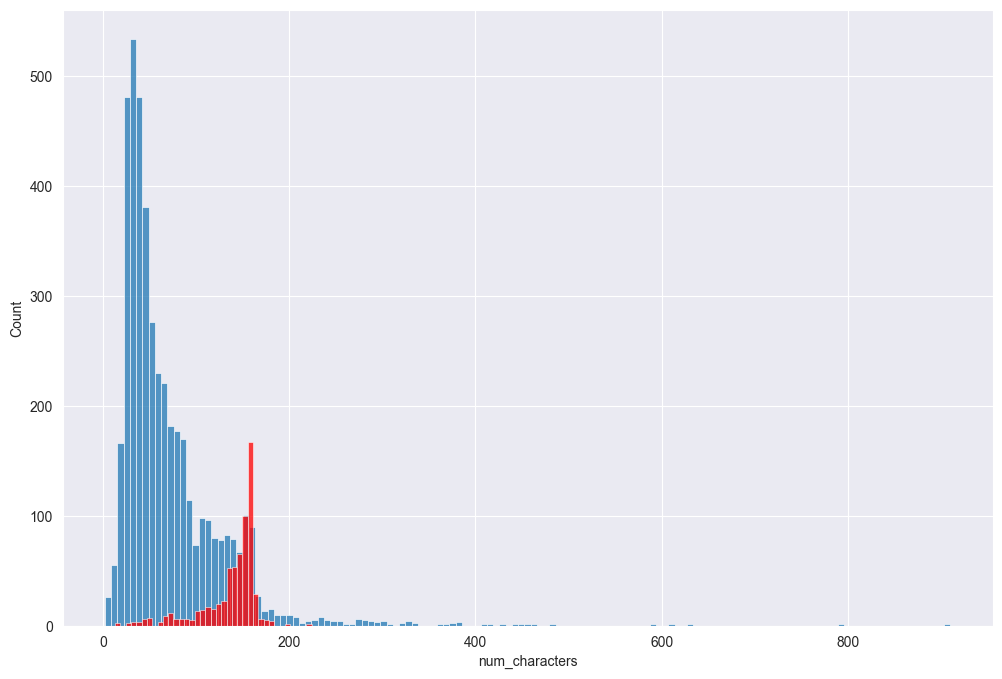

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color="red")

It shows that max of hams mails have less no. of characters while max of spam have high no. of characters.

Now for no. of words.

<Axes: xlabel='num_words', ylabel='Count'>

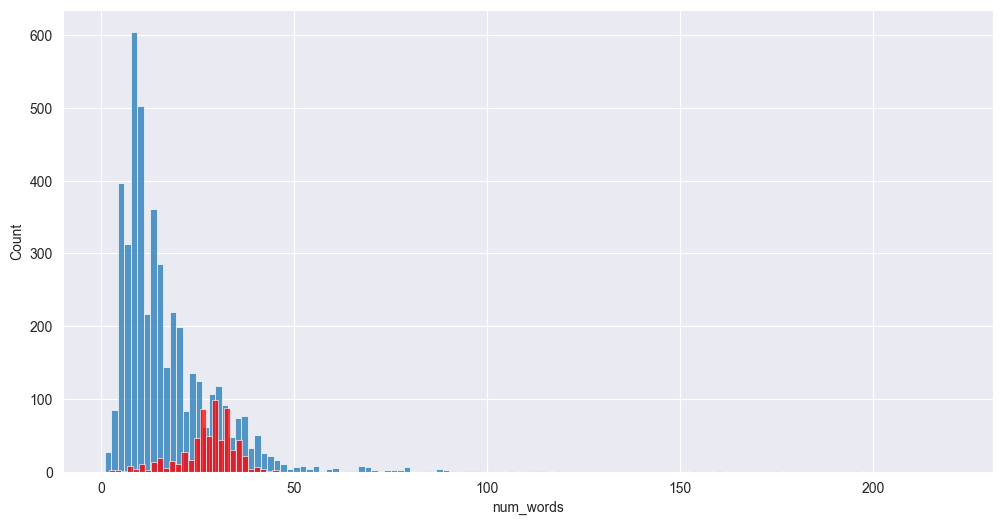

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color="red")

In this case both have high amount of words and less amount of words so no any special relation.

Now relationship between no. of sentences and no. of words.

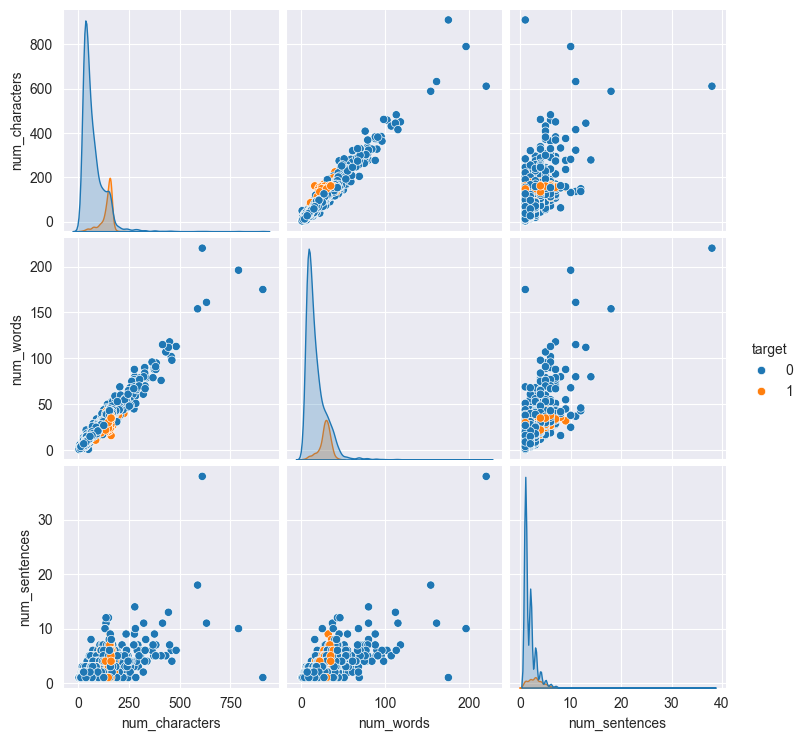

In [33]:
sns.pairplot(df, hue='target')

The Correlation Coe-efficient of Data.

In [34]:
correlation = df.select_dtypes(include='number').corr()

<Axes: >

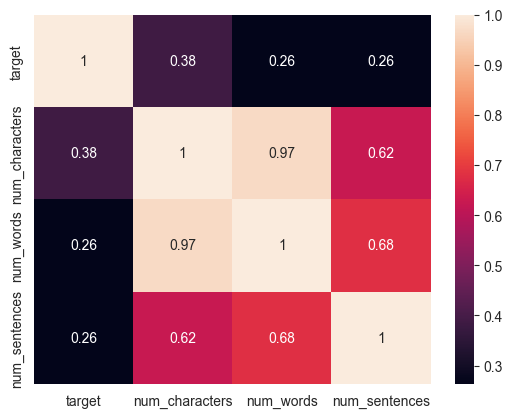

In [35]:
sns.heatmap(correlation, annot=True)

As no. of characters increases the tendancy of 1(spam) also increases. And the correlation b/w num of sentences and num of characters are very high and b/w num of words and num of sentences as much higher than the characters and b/w characters and words are the highest.

According to the hypothesis, If we want to make model for that we will select one of them(characters, words or sentences). So we will choose the characters which high the variation b/w all over the data.